# Ridge and Lasso

In [4]:
from sklearn.datasets import load_boston

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = load_boston()

In [9]:
datasets = pd.DataFrame(df.data)
print(datasets.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [10]:
datasets.columns = df.feature_names

In [12]:
datasets.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
df.target.shape

(506,)

In [15]:
datasets['Price'] = df.target

In [19]:
datasets.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
X = datasets.iloc[:, :-1]
y = datasets.iloc[:, -1]

# Linear Regression

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [23]:
Linear_reg = LinearRegression()

In [25]:
mse = cross_val_score(Linear_reg, X, y, scoring='neg_mean_squared_error', cv=5)

In [27]:
mean_mse = np.mean(mse)
print(mean_mse)

-37.131807467699296


# Ridge Regression

In [29]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [30]:
ridge = Ridge()

In [34]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [36]:
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

In [37]:
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [38]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540344


# Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\HP\.virtualenvs\data-science-kLkPvyWw\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4656.829778383806, tolerance: 3.919148542079208
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\.virtualenvs\data-science-kLkPvyWw\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4437.458567088543, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\.virtualenvs\data-science-kLkPvyWw\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4192.39027103402, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\HP\.virtualenvs\data-science-kLkPv

{'alpha': 1}
-35.53158022069486


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
predicition_lasso = lasso_regressor.predict(X_test)
predicition_ridge = ridge_regressor.predict(X_test)

<AxesSubplot:xlabel='Price'>

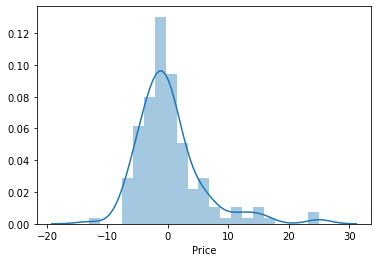

In [43]:
import seaborn as sns

sns.distplot(y_test - predicition_lasso)

<AxesSubplot:xlabel='Price'>

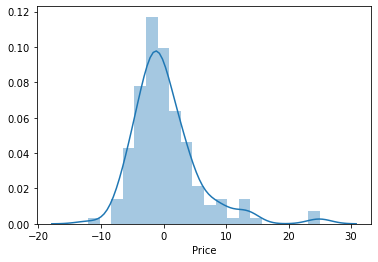

In [44]:
import seaborn as sns

sns.distplot(y_test - predicition_ridge)